# Predicting Power Outages and Their Cause

**Name(s)**: Ava Jeong and Charlene Hsu

**Website Link**: https://github.com/charl3n3hsu/DSC80_Final_Proj

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
from IPython.display import display, IFrame, HTML

import plotly
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from dsc80_utils import *

## Step 1: Introduction

In [3]:
# TODO

## Step 2: Data Cleaning and Exploratory Data Analysis

In [4]:
outages = pd.read_csv('outages.csv')
outages = outages.iloc[1:]
outages

,variables,OBS,YEAR,MONTH,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
1,NaN,1.0,2011.0,7.0,...,0.6,91.59266587,8.407334131,5.478742983
2,NaN,2.0,2014.0,5.0,...,0.6,91.59266587,8.407334131,5.478742983
3,NaN,3.0,2010.0,10.0,...,0.6,91.59266587,8.407334131,5.478742983
...,...,...,...,...,...,...,...,...,...
1532,NaN,1532.0,2009.0,8.0,...,0.15,98.30774418,1.692255822,1.692255822
1533,NaN,1533.0,2009.0,8.0,...,0.15,98.30774418,1.692255822,1.692255822
1534,NaN,1534.0,2000.0,NaN,...,0.02,85.76115446,14.23884554,2.901181874


In [5]:
outages.columns

Index(['variables', 'OBS', 'YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE',
       'NERC.REGION', 'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE',
       'OUTAGE.RESTORATION.TIME', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL',
       'HURRICANE.NAMES', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW',
       'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE', 'IND.PRICE',
       'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES',
       'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS',
       'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT',
       'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA',
       'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP',
       'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION', 'POPPCT_URBAN',
       'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL',
       'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND', 'PCT_WAT

In [6]:
outages[['OUTAGE.RESTORATION.TIME']]

,OUTAGE.RESTORATION.TIME
1,8:00:00 PM
2,6:39:00 PM
3,10:00:00 PM
...,...
1532,11:53:00 PM
1533,2:01:00 PM
1534,NaN


In [7]:
print(outages.dtypes)

print(outages[outages['OUTAGE.DURATION'].astype(float) <= 0])

missing_values = outages[['CAUSE.CATEGORY', 'OUTAGE.DURATION']].isnull().sum()
print("Missing Values:\n", missing_values)

variables            object
OBS                 float64
YEAR                float64
                     ...   
PCT_LAND             object
PCT_WATER_TOT        object
PCT_WATER_INLAND     object
Length: 57, dtype: object
     variables     OBS    YEAR  MONTH  ... AREAPCT_UC     PCT_LAND  \
13         NaN    13.0  2011.0    7.0  ...        0.6  91.59266587   
17         NaN    17.0  2012.0    8.0  ...       1.72  97.84310934   
27         NaN    27.0  2011.0    6.0  ...       1.72  97.84310934   
...        ...     ...     ...    ...  ...        ...          ...   
1481       NaN  1481.0  2011.0    5.0  ...        1.4  95.76425286   
1522       NaN  1522.0  2011.0   12.0  ...       0.19  98.89193361   
1527       NaN  1527.0  2016.0    3.0  ...       0.19  98.89193361   

     PCT_WATER_TOT PCT_WATER_INLAND  
13     8.407334131      5.478742983  
17     2.156890661      2.156890661  
27     2.156890661      2.156890661  
...            ...              ...  
1481    4.24644347       3.

In [8]:
outages['OUTAGE.DURATION'] = pd.to_numeric(outages['OUTAGE.DURATION'], errors='coerce')
outages['OUTAGE.DURATION'] = outages.groupby('CAUSE.CATEGORY')['OUTAGE.DURATION'].transform(lambda x: x.fillna(x.median()))
outages

,variables,OBS,YEAR,MONTH,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
1,NaN,1.0,2011.0,7.0,...,0.6,91.59266587,8.407334131,5.478742983
2,NaN,2.0,2014.0,5.0,...,0.6,91.59266587,8.407334131,5.478742983
3,NaN,3.0,2010.0,10.0,...,0.6,91.59266587,8.407334131,5.478742983
...,...,...,...,...,...,...,...,...,...
1532,NaN,1532.0,2009.0,8.0,...,0.15,98.30774418,1.692255822,1.692255822
1533,NaN,1533.0,2009.0,8.0,...,0.15,98.30774418,1.692255822,1.692255822
1534,NaN,1534.0,2000.0,NaN,...,0.02,85.76115446,14.23884554,2.901181874


In [9]:
# Imputation
category_mapping = outages.dropna(subset=['CAUSE.CATEGORY']).groupby('CAUSE.CATEGORY.DETAIL')['CAUSE.CATEGORY'].agg(pd.Series.mode)

def infer_category(detail):
    if pd.notna(detail) and detail in category_mapping:
        return category_mapping[detail]
    return None


outages['CAUSE.CATEGORY'] = outages.apply(lambda row: infer_category(row['CAUSE.CATEGORY.DETAIL']) if pd.isna(row['CAUSE.CATEGORY']) else row['CAUSE.CATEGORY'], axis=1)

outages['CAUSE.CATEGORY'] = outages['CAUSE.CATEGORY'].fillna(outages['CAUSE.CATEGORY'].mode()[0])



In [10]:
print(outages.isnull().sum())

variables           1534
OBS                    0
YEAR                   0
                    ... 
PCT_LAND               0
PCT_WATER_TOT          0
PCT_WATER_INLAND       0
Length: 57, dtype: int64


In [11]:
# Plotting

#Boxplot
fig = px.box(outages, x="CAUSE.CATEGORY", y="OUTAGE.DURATION", 
             title="Distribution of Outage Duration by Cause Category",
             points="all")  # Show all points

fig.show()

In [12]:
# Bar 
df_summary = outages.groupby("CAUSE.CATEGORY")["OUTAGE.DURATION"].agg(["mean", "median"]).reset_index()

fig = px.bar(df_summary, x="CAUSE.CATEGORY", y=["mean", "median"], 
             title="Mean and Median Outage Duration by Cause Category",
             barmode="group")

fig.update_layout(xaxis_title="Cause Category", yaxis_title="Duration (mins)")
fig.show()

## Step 3: Assessment of Missingness

In [19]:
# Permutation Test for Missingness

def permutation_test(data, col_missing, col_test, num_permutations=1000):
    cause_frequencies = data[col_test].value_counts(normalize=True).to_dict()
    
    data['CAUSE_ENCODED'] = data[col_test].map(cause_frequencies)
    
    observed_diff = abs(data[data[col_missing].isnull()]['CAUSE_ENCODED'].mean() -
                        data[~data[col_missing].isnull()]['CAUSE_ENCODED'].mean())
    
    perm_diffs = []
    for _ in range(num_permutations):
        shuffled = data['CAUSE_ENCODED'].sample(frac=1, replace=False).reset_index(drop=True)
        perm_diff = abs(data[data[col_missing].isnull()].index.to_series().map(shuffled).mean() -
                        data[~data[col_missing].isnull()].index.to_series().map(shuffled).mean())
        perm_diffs.append(perm_diff)
    
    p_value = np.mean(np.array(perm_diffs) >= observed_diff)
    
    fig = px.histogram(perm_diffs, nbins=30, title=f'Permutation Test for Missingness in {col_missing}', 
                       labels={'value': 'Test Statistic (Mean Difference)'}, opacity=0.7)
    fig.add_vline(x=observed_diff, line_dash='dash', line_color='red', annotation_text='Observed Difference')
    fig.show()
    
    return observed_diff, p_value

df = pd.read_csv('outages.csv').iloc[1:]
df['OUTAGE.DURATION'] = pd.to_numeric(df['OUTAGE.DURATION'], errors='coerce')
observed_diff, p_value = permutation_test(df, 'OUTAGE.DURATION', 'CAUSE.CATEGORY')
print(f"Observed Difference: {observed_diff}, P-Value: {p_value}")

Observed Difference: 0.08634898930475615, P-Value: 0.0


## Step 4: Hypothesis Testing

In [29]:
from scipy.stats import kruskal

# Drop rows with missing values in the columns of interest
outages_clean = outages.dropna(subset=['CAUSE.CATEGORY', 'OUTAGE.DURATION'])

# Group outage durations by cause category
groups = [group['OUTAGE.DURATION'].values for name, group in outages_clean.groupby('CAUSE.CATEGORY')]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

print(f"Kruskal-Wallis Test Statistic: {statistic}, P-Value: {p_value}")

# Create a violin plot
fig = px.violin(outages_clean, x="CAUSE.CATEGORY", y="OUTAGE.DURATION", 
                title="Distribution of Outage Durations by Cause Category",
                box=True, points="all", hover_data=outages_clean.columns)

# Update layout
fig.update_layout(xaxis_title="Cause Category", yaxis_title="Outage Duration (mins)")
fig.show()

Kruskal-Wallis Test Statistic: 700.6054239816652, P-Value: 4.526908484457232e-148


Observed Maximum Absolute Difference in Means: 10861.13768115942
P-Value: 0.0


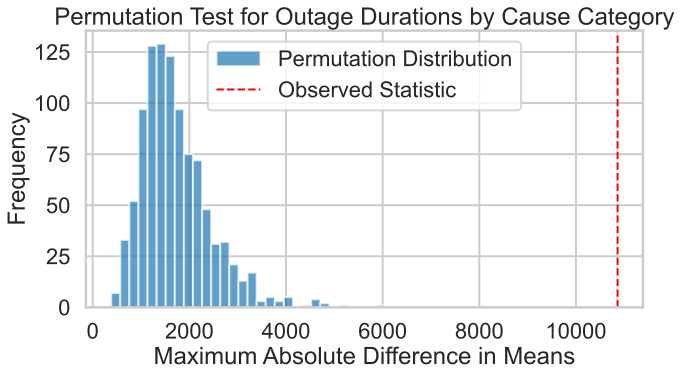

In [32]:
# Drop rows with missing values in the columns of interest
outages_clean = outages.dropna(subset=['CAUSE.CATEGORY', 'OUTAGE.DURATION'])

# Calculate mean outage duration for each cause category
mean_durations = outages_clean.groupby('CAUSE.CATEGORY')['OUTAGE.DURATION'].mean()

# Compute pairwise absolute differences in means
pairwise_differences = np.abs(mean_durations.values[:, None] - mean_durations.values)

# Find the maximum absolute difference (observed test statistic)
observed_statistic = np.max(pairwise_differences)
print(f"Observed Maximum Absolute Difference in Means: {observed_statistic}")

# Number of permutations
num_permutations = 1000

# Initialize an array to store permutation results
permutation_stats = np.zeros(num_permutations)

# Perform permutations
for i in range(num_permutations):
    # Shuffle the outage durations
    shuffled_durations = np.random.permutation(outages_clean['OUTAGE.DURATION'].values)
    
    # Create a temporary DataFrame with shuffled durations
    temp_df = outages_clean.copy()
    temp_df['SHUFFLED_DURATION'] = shuffled_durations
    
    # Calculate mean shuffled duration for each cause category
    shuffled_means = temp_df.groupby('CAUSE.CATEGORY')['SHUFFLED_DURATION'].mean()
    
    # Compute pairwise absolute differences in means
    shuffled_differences = np.abs(shuffled_means.values[:, None] - shuffled_means.values)
    
    # Store the maximum absolute difference
    permutation_stats[i] = np.max(shuffled_differences)

# Calculate the p-value
p_value = np.mean(permutation_stats >= observed_statistic)
print(f"P-Value: {p_value}")

# Plot the permutation distribution
plt.hist(permutation_stats, bins=30, alpha=0.7, label='Permutation Distribution')
plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.xlabel('Maximum Absolute Difference in Means')
plt.ylabel('Frequency')
plt.title('Permutation Test for Outage Durations by Cause Category')
plt.legend()
plt.show()

## Step 5: Framing a Prediction Problem

In [13]:
# TODO

## Step 6: Baseline Model

In [14]:
# TODO

## Step 7: Final Model

In [15]:
# TODO

## Step 8: Fairness Analysis

In [16]:
# TODO